In [1]:
# 在3.ipynb
# 我们证明了如果不限制时间，我们收益的期望的最大值是正无穷
# 现在，我们考虑首达时的期望ETₚ
# 要赚钱速度最大化
# max p/ETₚ

In [22]:
using DifferentialEquations
using Distributions
using Plots
using KernelDensity
global Θ=1.0
global μ=100.0
global σ=1.0
global t0=0.0
global dt=0.01
global T=1000.0

1000.0

In [3]:
function FPT(a,b) #首达时间
    if a==b
        return 0.0
    end 
    X=OrnsteinUhlenbeckProcess(Θ,μ,σ,t0,μ+a)
    X.dt=dt
    calculate_step!(X,dt,nothing,nothing)
    for t in dt:dt:T
        accept_step!(X,dt,nothing,nothing)
        if a<b && X.curW>μ+b
            return X.curt
        end
        if a>b && X.curW<μ+b
            return X.curt
        end
    end
    return Inf
end
function ET(a,b)
    N=1000
    S=Array{Float64}(undef,N)
    for i in 1:N
        S[i]=FPT(a,b)
    end
    r=findall(x->x!=Inf,S)
    if length(r)/length(S)<0.999
        println("P(reached)=",length(r)/length(S))
        println("T is too small when a=$a b=$b")
    end
    return mean(S[r])
end
x=0:0.1:2
y=ET.(0,x)

21-element Vector{Float64}:
  0.0
  0.28441999999999945
  0.5039999999999986
  0.7874099999999968
  1.0226999999999946
  1.4561199999999912
  1.9373099999999837
  2.2315299999999816
  2.7585099999999767
  3.599259999999967
  4.767959999999971
  5.6555699999999804
  7.6512700000000065
  9.047150000000027
 11.680490000000136
 15.062980000000108
 18.63873000000016
 26.135020000000683
 34.14796000000086
 50.735550000000735
 69.42743999999733

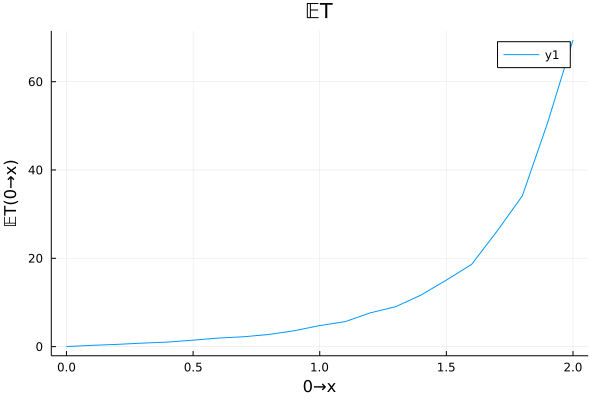

In [4]:
plot(x,y,xlabel="0→x",ylabel="𝔼T(0→x)",title="𝔼T")

In [5]:
# 下面来算𝔼T
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8795862
# 引入特征函数，特征函数好算
# 然后就知道各阶矩了，期望是一阶矩
# https://core.ac.uk/download/pdf/76532156.pdf
# 还是用Fokker-Planck
# 实际上FPT指的是从区域内一点出发，撞到边界上
# 我只有一边有边界
# https://math.stackexchange.com/questions/1874361/derivation-of-first-passage-time-density-for-ornstein-uhlenbeck-process
# https://www.jstor.org/stable/pdf/3214232.pdf?refreqid=excelsior%3A75ddc1e116a7650d2cf069cfac9bb062&ab_segments=&origin=&acceptTC=1
# 用拉普拉斯变换
# 这篇文章算了结果！
# Parabolic cylinder function
# 可以用合流超几何函数表达出来
# 但是现在这种类似数理方法的风格还有package支持吗？
# Julia能不能call Mathematica？
# 有！
# ??? 他用这个拉普拉斯变换和我算出来的一样
# 不不不我只有a=0，他比我厉害一点点
# https://www.jstor.org/stable/pdf/3214232.pdf?refreqid=excelsior%3A75ddc1e116a7650d2cf069cfac9bb062&ab_segments=&origin=&acceptTC=1
# 是一个无穷级数
# 它讨论了渐进行为
# 但是有更好的表示方式，有解析解
# http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.598.7668&rep=rep1&type=pdf

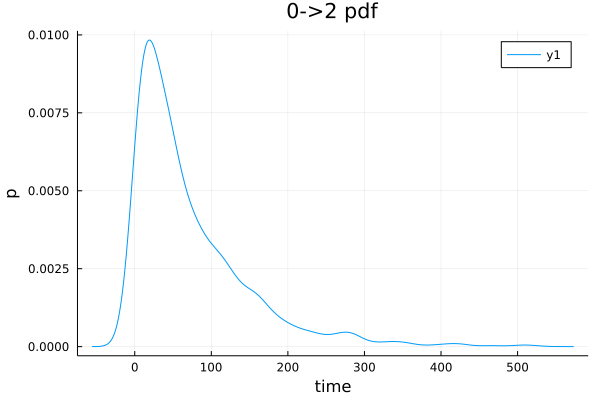

In [28]:
# 固定ab，看FPT的分布
function pdf_FPT(a,b)
    N=1000
    S=Array{Float64}(undef,N)
    for i in 1:N
        S[i]=FPT(a,b)
    end
    sort!(S)
    r=searchsorted(S,Inf)
    U = kde(@view S[1:r.start-1])
    return U
end
U=pdf_FPT(0,2)
plot(U.x,U.density,title="0->2 pdf",xlabel="time",ylabel="p")

In [23]:
using MathLink
D(ν,z) = weval(W"ParabolicCylinderD"(ν,z))
ν=-σ/Θ
function pdf_1988(a,b,t)
    
end

pdf_1988 (generic function with 1 method)

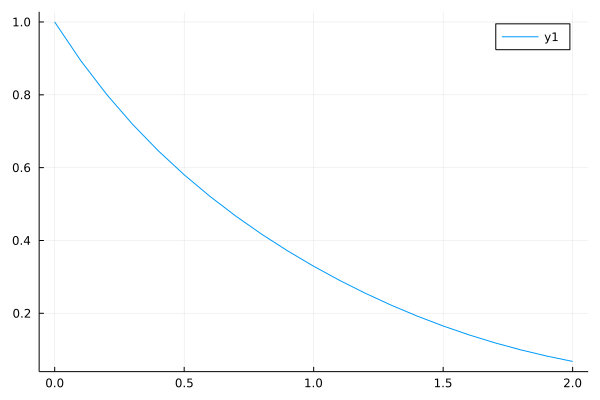

In [24]:

y_theory=pdf_1988(0,x)
plot(x,y_theory)